In [8]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.4.0


In [9]:
position=50
a = tf.range(position, dtype=tf.float32)
print(a)
print(a.numpy())
print(a.shape)

a = tf.range(position, dtype=tf.float32)[:, tf.newaxis]
print(a.shape)
print(a)

tf.Tensor(
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49.], shape=(50,), dtype=float32)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49.]
(50,)
(50, 1)
tf.Tensor(
[[ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]
 [11.]
 [12.]
 [13.]
 [14.]
 [15.]
 [16.]
 [17.]
 [18.]
 [19.]
 [20.]
 [21.]
 [22.]
 [23.]
 [24.]
 [25.]
 [26.]
 [27.]
 [28.]
 [29.]
 [30.]
 [31.]
 [32.]
 [33.]
 [34.]
 [35.]
 [36.]
 [37.]
 [38.]
 [39.]
 [40.]
 [41.]
 [42.]
 [43.]
 [44.]
 [45.]
 [46.]
 [47.]
 [48.]
 [49.]], shape=(50, 1), dtype=float32)


In [10]:
d_model = 128
i = tf.range(d_model, dtype=tf.float32)[tf.newaxis, :]
print(i.shape)
print(i)

(1, 128)
tf.Tensor(
[[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
   14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
   28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
   42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
   56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
   70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
   84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
   98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
  112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
  126. 127.]], shape=(1, 128), dtype=float32)


In [11]:
a = np.arange(1,5).reshape(4,1)
b = 3
c = a*b  # (4,1)*3 => (4,1)(4,1)
print(a)
print(c)

[[1]
 [2]
 [3]
 [4]]
[[ 3]
 [ 6]
 [ 9]
 [12]]


In [12]:
a = np.arange(1,5).reshape(4,1)
b = np.array([3])
c = a*b  # (4,1)*(1,) => (4,1)(4,1)
print(a)
print(c)

[[1]
 [2]
 [3]
 [4]]
[[ 3]
 [ 6]
 [ 9]
 [12]]


In [13]:
a = np.arange(1,13).reshape(4,3)
b = np.array([[3],
              [3],
              [3],
              [3]])
c = a*b  # (4,3)*(4,1) => (4,3)(4,3)
print(a)
print(c)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[ 3  6  9]
 [12 15 18]
 [21 24 27]
 [30 33 36]]


In [14]:
a = np.arange(1,4).reshape(1,3)
b = np.array([[3],
              [3],
              [3],
              [3]])
c = a*b  # (1,3)*(4,1) => (4,3)(4,3)
print(a)
print(c)

[[1 2 3]]
[[3 6 9]
 [3 6 9]
 [3 6 9]
 [3 6 9]]


In [15]:
print(tf.math.sin(90.*np.pi/180))

tf.Tensor(1.0, shape=(), dtype=float32)


In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

class PositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, position, d_model):
#         print("PositionalEncoding.__init__()", position, d_model)
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)

    def get_angles(self, position, i, d_model):
#         print("PositionalEncoding.get_angles()")
#         print(position)
#         print(i)
#         print(d_model)
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
#         print(angles.shape)
#         print(angles)
        return position * angles    #   (5,1)*(1,8) => (5,8)*(5,8)

    def positional_encoding(self, position, d_model):
#         print("PositionalEncoding.positional_encoding()", position, d_model)
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model)

#         print(angle_rads)
        # 배열의 짝수 인덱스(2i)에는 사인 함수 적용
        sines = tf.math.sin(angle_rads[:, 0::2])
#         print(sines)
        
        # 배열의 홀수 인덱스(2i+1)에는 코사인 함수 적용
        cosines = tf.math.cos(angle_rads[:, 1::2])
#         print(cosines)

        pos_encoding = tf.concat([sines, cosines], axis=-1)
#         print(pos_encoding.shape)
#         print(pos_encoding)
        pos_encoding = pos_encoding[tf.newaxis, ...]
#         print(pos_encoding.shape)
        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

tf.Tensor(
[[[ 0.          0.          0.         ...  1.          1.
    1.        ]
  [ 0.841471    0.7617204   0.68156135 ...  1.          1.
    1.        ]
  [ 0.90929747  0.98704624  0.99748    ...  0.99999994  0.99999994
    1.        ]
  ...
  [ 0.6569866  -0.21963017 -0.8593135  ...  0.9999994   0.9999996
    0.9999997 ]
  [ 0.98935825  0.60082203 -0.28022808 ...  0.9999992   0.9999994
    0.9999996 ]
  [ 0.4121185   0.99818236  0.4491935  ...  0.99999905  0.9999993
    0.99999946]]], shape=(1, 10, 128), dtype=float32)


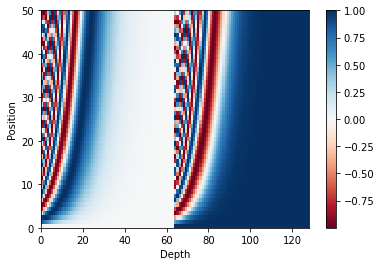

In [17]:
sample_pos_encoding = PositionalEncoding(50, 128)
# print(sample_pos_encoding.pos_encoding)
                                            # (N,T,D)
                                            # tf.shape(inputs)[1]
print(sample_pos_encoding.pos_encoding[:, :10, :])

plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 128))
plt.ylabel('Position')
plt.colorbar()
plt.show()

In [66]:
query = tf.constant(np.arange(1,25).reshape(1,2,4,3),dtype=tf.float32)
print(query)

key = tf.constant(np.ones((1,2,4,3)),dtype=tf.float32)
print(key)

matmul_qk = tf.matmul(query, key, transpose_b=True)
print("matmul_qk=", matmul_qk)

tf.Tensor(
[[[[ 1.  2.  3.]
   [ 4.  5.  6.]
   [ 7.  8.  9.]
   [10. 11. 12.]]

  [[13. 14. 15.]
   [16. 17. 18.]
   [19. 20. 21.]
   [22. 23. 24.]]]], shape=(1, 2, 4, 3), dtype=float32)
tf.Tensor(
[[[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]]], shape=(1, 2, 4, 3), dtype=float32)
matmul_qk= tf.Tensor(
[[[[ 6.  6.  6.  6.]
   [15. 15. 15. 15.]
   [24. 24. 24. 24.]
   [33. 33. 33. 33.]]

  [[42. 42. 42. 42.]
   [51. 51. 51. 51.]
   [60. 60. 60. 60.]
   [69. 69. 69. 69.]]]], shape=(1, 2, 4, 4), dtype=float32)


In [72]:
def scaled_dot_product_attention(query, key, value, mask):
    # query 크기 : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    # key 크기 : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
    # value 크기 : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
    # padding_mask : (batch_size, 1, 1, key의 문장 길이)

    # Q와 K의 곱. 어텐션 스코어 행렬.
    matmul_qk = tf.matmul(query, key, transpose_b=True) # (1,4,4,128)(1,4,128,4)
    print("matmul_qk.shape =", matmul_qk.shape)         # (1,4,4,4)
    # 스케일링
    # dk의 루트값으로 나눠준다.
    depth = tf.cast(tf.shape(key)[-1], tf.float32)
    print("depth=",depth)
    logits = matmul_qk / tf.math.sqrt(depth)
    print("logits=",logits)

    # 마스킹. 어텐션 스코어 행렬의 마스킹 할 위치에 매우 작은 음수값을 넣는다.
    # 매우 작은 값이므로 소프트맥스 함수를 지나면 행렬의 해당 위치의 값은 0이 된다.
    if mask is not None:
        logits += (mask * -1e9)

    # 소프트맥스 함수는 마지막 차원인 key의 문장 길이 방향으로 수행된다.
    # attention weight : (batch_size, num_heads, query의 문장 길이, key의 문장 길이)
    attention_weights = tf.nn.softmax(logits, axis=-1)
    print("attention_weights.shape =",attention_weights.shape)  # (1,4,4,4)
    # output : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    output = tf.matmul(attention_weights, value) # (1,4,4,4)(1,4,4,32) => (1,4,4,32)
    print("output.shape =", output.shape) 

    return output, attention_weights

In [68]:
np.set_printoptions(suppress=True)
temp_k = tf.constant([[10,0,0],
                      [0,10,0],
                      [0,0,10],
                      [0,0,10]], dtype=tf.float32)  # (4, 3)

temp_v = tf.constant([[   1,0],
                      [  10,0],
                      [ 100,5],
                      [1000,6]], dtype=tf.float32)  # (4, 2)
temp_q = tf.constant([[0, 10, 0]], dtype=tf.float32)  # (1, 3)

In [69]:
# temp_q = tf.constant([[0, 0, 10]], dtype=tf.float32)
temp_out, temp_attn = scaled_dot_product_attention(temp_q, temp_k, temp_v, None)
print(temp_attn) # 어텐션 분포(어텐션 가중치의 나열)
print(temp_out) # 어텐션 값

matmul_qk.shape = (1, 4)
depth= tf.Tensor(3.0, shape=(), dtype=float32)
logits= tf.Tensor([[ 0.       57.735027  0.        0.      ]], shape=(1, 4), dtype=float32)
attention_weights.shape = (1, 4)
out.shape = (1, 4)
tf.Tensor([[0. 1. 0. 0.]], shape=(1, 4), dtype=float32)
tf.Tensor([[10.  0.]], shape=(1, 2), dtype=float32)


In [26]:
temp_q = tf.constant([[0, 0, 10], [0, 10, 0], [10, 10, 0]], dtype=tf.float32)  # (3, 3)
temp_out, temp_attn = scaled_dot_product_attention(temp_q, temp_k, temp_v, None)
print(temp_attn) # 어텐션 분포(어텐션 가중치의 나열)
print(temp_out) # 어텐션 값

matmul_qk= tf.Tensor(
[[  0.   0. 100. 100.]
 [  0. 100.   0.   0.]
 [100. 100.   0.   0.]], shape=(3, 4), dtype=float32)
depth= tf.Tensor(3.0, shape=(), dtype=float32)
logits= tf.Tensor(
[[ 0.        0.       57.735027 57.735027]
 [ 0.       57.735027  0.        0.      ]
 [57.735027 57.735027  0.        0.      ]], shape=(3, 4), dtype=float32)
attention_weights= tf.Tensor(
[[0.  0.  0.5 0.5]
 [0.  1.  0.  0. ]
 [0.5 0.5 0.  0. ]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[0.  0.  0.5 0.5]
 [0.  1.  0.  0. ]
 [0.5 0.5 0.  0. ]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[550.    5.5]
 [ 10.    0. ]
 [  5.5   0. ]], shape=(3, 2), dtype=float32)


In [34]:
dense1 = tf.keras.layers.Dense(4)  # weight = (?,4)  , bias = (4,)
# dir(dense1)
print(dense1.weights)
x = tf.constant([[1,2,3]])
print(x.shape)
out = dense1(x)   # (1,3)(3,4)+(4,)
print(dense1.weights)

[]
(1, 3)
[<tf.Variable 'dense_9/kernel:0' shape=(3, 4) dtype=float32, numpy=
array([[-0.55661595,  0.82509804,  0.26806664,  0.5745529 ],
       [ 0.38482738,  0.18366551,  0.59290886, -0.3469832 ],
       [ 0.18667257,  0.6465657 , -0.30440807, -0.02304095]],
      dtype=float32)>, <tf.Variable 'dense_9/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]


In [43]:
class MyLayer:
    def __call__(self):
        self.call()

class AAA(MyLayer):
    def foo(self):
        print("AAA.foo()")
        
    def call(self):
        print("AAA.call()")

aaa = AAA()
aaa.foo()
aaa()

AAA.foo()
AAA.call()


In [75]:
class MultiHeadAttention(tf.keras.layers.Layer):

    def __init__(self, d_model, num_heads, name="multi_head_attention"):
        super(MultiHeadAttention, self).__init__(name=name)
        
        print("MultiHeadAttention.__init__()")
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        # d_model을 num_heads로 나눈 값.
        # 논문 기준 : 64
        self.depth = d_model // self.num_heads

        # WQ, WK, WV에 해당하는 밀집층 정의
        self.query_dense = tf.keras.layers.Dense(units=d_model)
        self.key_dense = tf.keras.layers.Dense(units=d_model)
        self.value_dense = tf.keras.layers.Dense(units=d_model)

        # WO에 해당하는 밀집층 정의
        self.dense = tf.keras.layers.Dense(units=d_model)

  # num_heads 개수만큼 q, k, v를 split하는 함수
    def split_heads(self, inputs, batch_size):
        print("split_heads()")
        print(inputs.shape)
        inputs = tf.reshape(                                             # (1,4,128)
                                                                         # (batch_size, query의 문장 길이, num_heads, d_model/num_heads)
            inputs, shape=(batch_size, -1, self.num_heads, self.depth))  # (1,4,4,32)
                                                                         # (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
        print(inputs.shape)                                              # (1,4,4,32)
        return tf.transpose(inputs, perm=[0, 2, 1, 3])
    
    def call(self, inputs):
        query, key, value, mask = inputs['query'], inputs['key'], inputs[
            'value'], inputs['mask']
        batch_size = tf.shape(query)[0]

        # 1. WQ, WK, WV에 해당하는 밀집층 지나기
        # q : (batch_size, query의 문장 길이, d_model)  =>  (1,4,128)
        # k : (batch_size, key의 문장 길이, d_model)
        # v : (batch_size, value의 문장 길이, d_model)
        # 참고) 인코더(k, v)-디코더(q) 어텐션에서는 query 길이와 key, value의 길이는 다를 수 있다.
        query = self.query_dense(query)    # (1,4,128)(128,128) => (1,4,128)
        key = self.key_dense(key)          # (1,4,128)(128,128) => (1,4,128)
        value = self.value_dense(value)    # (1,4,128)(128,128) => (1,4,128)
        
        print(query.shape)
        print(key.shape)
        print(value.shape)
        
#         print(query[0,0,:])
#         print(key[0,0,:])

        # 2. 헤드 나누기
        # q : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
        # k : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
        # v : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)
        print(query.shape)
        print(key.shape)
        print(value.shape)
        

        # 3. 스케일드 닷 프로덕트 어텐션. 앞서 구현한 함수 사용.
        # (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
        scaled_attention, _ = scaled_dot_product_attention(query, key, value, mask)
        # (batch_size, query의 문장 길이, num_heads, d_model/num_heads)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        print('scaled_attention.shape=',scaled_attention.shape)
        
        # 4. 헤드 연결(concatenate)하기
        # (batch_size, query의 문장 길이, d_model)
        concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))
        print('concat_attention.shape=',concat_attention.shape)

        # 5. WO에 해당하는 밀집층 지나기
        # (batch_size, query의 문장 길이, d_model)
        outputs = self.dense(concat_attention)  # (1,4,128)(128,128) => (1,4,128)
        print('outputs.shape=',outputs.shape)

        return outputs

In [76]:
mha = MultiHeadAttention(128,4)
x = tf.constant(np.random.randn(1,4,128))
inputs = { 'query':x, 'key':x, 'value':x, 'mask':None }
mha(inputs)

MultiHeadAttention.__init__()
(1, 4, 128)
(1, 4, 128)
(1, 4, 128)
split_heads()
(1, 4, 128)
(1, 4, 4, 32)
split_heads()
(1, 4, 128)
(1, 4, 4, 32)
split_heads()
(1, 4, 128)
(1, 4, 4, 32)
(1, 4, 4, 32)
(1, 4, 4, 32)
(1, 4, 4, 32)
matmul_qk.shape = (1, 4, 4, 4)
depth= tf.Tensor(32.0, shape=(), dtype=float32)
logits= tf.Tensor(
[[[[ 1.7398771  -2.1643188   0.41156888  0.07043239]
   [-0.27048534 -0.6996536  -0.61537534  1.8035806 ]
   [-1.5737541  -0.2142834  -1.8019285   0.428533  ]
   [-0.85640764  1.4194956   0.14027998 -0.09724399]]

  [[-1.1643927   0.00268122  0.07210209 -0.2735874 ]
   [-0.49486294  0.12640677  0.570364    0.03135174]
   [ 0.41558307  0.5080746  -0.10121492  0.548831  ]
   [-0.50739986  0.27554736  0.88465756  0.8942639 ]]

  [[-1.244622   -0.6136496   0.2805493   0.6679138 ]
   [-0.66873485  1.1642151   1.3082943  -1.589387  ]
   [-0.1016885  -3.0306976  -0.37181753 -0.11320281]
   [ 1.0955998   0.97543067  0.07731257 -0.82188904]]

  [[-0.20262912  1.2863495  -1.4

<tf.Tensor: shape=(1, 4, 128), dtype=float32, numpy=
array([[[ 1.0035399 , -1.020905  , -0.50631714, -0.36592218,
          0.671305  ,  0.03473164,  0.5851499 ,  0.5232848 ,
          0.22999378,  1.2364036 ,  1.1699761 , -0.44883388,
          0.06525836,  0.31910345,  1.0539893 ,  0.0708446 ,
          0.83263826,  0.5591353 ,  1.1927273 ,  0.7277354 ,
          1.1419245 , -0.50910413,  0.19744277,  0.7119322 ,
         -0.78679925, -0.80747014,  0.2701991 , -0.24448211,
          0.09912057,  0.0107861 , -0.31085268,  0.14942917,
          0.21453317, -0.26130947,  0.13440429, -0.2960468 ,
         -1.1826576 ,  0.6566272 , -1.1392852 ,  1.1487495 ,
         -0.7093831 , -0.09061407, -0.47957224,  0.44660354,
          0.16301167, -0.753829  ,  0.02921122,  0.23778833,
         -0.49838585, -0.16901098,  0.3296993 , -0.1178278 ,
         -1.086935  , -0.8376639 ,  0.06499963, -0.34968758,
          0.5421539 , -0.21439746,  0.7158248 , -0.24794605,
          1.1707609 , -1.3057268

In [ ]:
def create_padding_mask(x):
    mask = tf.cast(tf.math.equal(x, 0), tf.float32)
    # (batch_size, 1, 1, key의 문장 길이)
    return mask[:, tf.newaxis, tf.newaxis, :]

In [ ]:
print(create_padding_mask(tf.constant([[1, 21, 777, 0, 0]])))

In [ ]:
def encoder_layer(dff, d_model, num_heads, dropout, name="encoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

    # 인코더는 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # 멀티-헤드 어텐션 (첫번째 서브층 / 셀프 어텐션)
    attention = MultiHeadAttention(
        d_model, num_heads, name="attention")({
            'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
            'mask': padding_mask # 패딩 마스크 사용
        })

    # 드롭아웃 + 잔차 연결과 층 정규화
    attention = tf.keras.layers.Dropout(rate=dropout)(attention)
    attention = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(inputs + attention)

    # 포지션 와이즈 피드 포워드 신경망 (두번째 서브층)
    outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # 드롭아웃 + 잔차 연결과 층 정규화
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention + outputs)

    return tf.keras.Model(
        inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [ ]:
def encoder(vocab_size, num_layers, dff,
            d_model, num_heads, dropout,
            name="encoder"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")

    # 인코더는 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # 포지셔널 인코딩 + 드롭아웃
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    # 인코더를 num_layers개 쌓기
    for i in range(num_layers):
      outputs = encoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
          dropout=dropout, name="encoder_layer_{}".format(i),
      )([outputs, padding_mask])

    return tf.keras.Model(
        inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [ ]:
def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1]
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    padding_mask = create_padding_mask(x) # 패딩 마스크도 포함
    return tf.maximum(look_ahead_mask, padding_mask)
#     return look_ahead_mask

In [ ]:
print(create_look_ahead_mask(tf.constant([[4, 0, 0, 2, 5]])))

In [ ]:
def decoder_layer(dff, d_model, num_heads, dropout, name="decoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
    enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")

    # 디코더는 룩어헤드 마스크(첫번째 서브층)와 패딩 마스크(두번째 서브층) 둘 다 사용.
    look_ahead_mask = tf.keras.Input(
        shape=(1, None, None), name="look_ahead_mask")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    # 멀티-헤드 어텐션 (첫번째 서브층 / 마스크드 셀프 어텐션)
    attention1 = MultiHeadAttention(
        d_model, num_heads, name="attention_1")(inputs={
            'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
            'mask': look_ahead_mask # 룩어헤드 마스크
        })

    # 잔차 연결과 층 정규화
    attention1 = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention1 + inputs)

    # 멀티-헤드 어텐션 (두번째 서브층 / 디코더-인코더 어텐션)
    attention2 = MultiHeadAttention(
        d_model, num_heads, name="attention_2")(inputs={
            'query': attention1, 'key': enc_outputs, 'value': enc_outputs, # Q != K = V
            'mask': padding_mask # 패딩 마스크
        })

    # 드롭아웃 + 잔차 연결과 층 정규화
    attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
    attention2 = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention2 + attention1)

    # 포지션 와이즈 피드 포워드 신경망 (세번째 서브층)
    outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention2)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # 드롭아웃 + 잔차 연결과 층 정규화
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(outputs + attention2)

    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name)

In [ ]:
def decoder(vocab_size, num_layers, dff,
            d_model, num_heads, dropout,
            name='decoder'):
    inputs = tf.keras.Input(shape=(None,), name='inputs')
    enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')

    # 디코더는 룩어헤드 마스크(첫번째 서브층)와 패딩 마스크(두번째 서브층) 둘 다 사용.
    look_ahead_mask = tf.keras.Input(
        shape=(1, None, None), name='look_ahead_mask')
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    # 포지셔널 인코딩 + 드롭아웃
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    # 디코더를 num_layers개 쌓기
    for i in range(num_layers):
        outputs = decoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
            dropout=dropout, name='decoder_layer_{}'.format(i),
        )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name)

In [ ]:
def transformer(vocab_size, num_layers, dff,
                  d_model, num_heads, dropout,
                  name="transformer"):

    # 인코더의 입력
    inputs = tf.keras.Input(shape=(None,), name="inputs")

    # 디코더의 입력
    dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

    # 인코더의 패딩 마스크
    enc_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='enc_padding_mask')(inputs)

    # 디코더의 룩어헤드 마스크(첫번째 서브층)
    look_ahead_mask = tf.keras.layers.Lambda(
        create_look_ahead_mask, output_shape=(1, None, None),
        name='look_ahead_mask')(dec_inputs)

    # 디코더의 패딩 마스크(두번째 서브층)
    dec_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='dec_padding_mask')(inputs)

    # 인코더의 출력은 enc_outputs. 디코더로 전달된다.
    enc_outputs = encoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
        d_model=d_model, num_heads=num_heads, dropout=dropout,
    )(inputs=[inputs, enc_padding_mask]) # 인코더의 입력은 입력 문장과 패딩 마스크

    # 디코더의 출력은 dec_outputs. 출력층으로 전달된다.
    dec_outputs = decoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
        d_model=d_model, num_heads=num_heads, dropout=dropout,
    )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

    # 다음 단어 예측을 위한 출력층
    outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

In [ ]:
small_transformer = transformer(
    vocab_size = 9000,
    num_layers = 4,
    dff = 512,
    d_model = 128,
    num_heads = 4,
    dropout = 0.3,
    name="small_transformer")

tf.keras.utils.plot_model(
    small_transformer, to_file='small_transformer.png', show_shapes=True)

In [ ]:
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))

    loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')(y_true, y_pred)

    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)

    return tf.reduce_mean(loss)

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")
# Text(0.5, 0, 'Train Step')

#### tensorflow_datasets 처음 설치 시

In [ ]:
!pip install tensorflow_datasets 

#### tensorflow_datasets 업그레이드 시

In [ ]:
!pip3 install --user --upgrade tensorflow_datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
import time
import tensorflow_datasets as tfds
import tensorflow as tf

In [ ]:
print(tf.__version__)

In [ ]:
print(tfds.__version__)

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/songys/Chatbot_data/master/ChatbotData%20.csv", filename="ChatBotData.csv")
train_data = pd.read_csv('ChatBotData.csv')
train_data.head()

In [ ]:
print('챗봇 샘플의 개수 :', len(train_data))

In [ ]:
print(train_data.isnull().sum())

In [ ]:
questions = []
for sentence in train_data['Q']:
    # 구두점에 대해서 띄어쓰기
    # ex) 12시 땡! -> 12시 땡 !
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    questions.append(sentence)
answers = []
for sentence in train_data['A']:
    # 구두점에 대해서 띄어쓰기
    # ex) 12시 땡! -> 12시 땡 !
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    answers.append(sentence)

In [ ]:
print(questions[:5])
print(answers[:5])

In [ ]:
# 서브워드텍스트인코더를 사용하여 질문, 답변 데이터로부터 단어 집합(Vocabulary) 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    questions + answers, target_vocab_size=2**13)

In [ ]:
# 시작 토큰과 종료 토큰에 대한 정수 부여.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

# 시작 토큰과 종료 토큰을 고려하여 단어 집합의 크기를 + 2
VOCAB_SIZE = tokenizer.vocab_size + 2

In [ ]:
print('시작 토큰 번호 :',START_TOKEN)
print('종료 토큰 번호 :',END_TOKEN)
print('단어 집합의 크기 :',VOCAB_SIZE)

In [ ]:
# 서브워드텍스트인코더 토크나이저의 .encode()를 사용하여 텍스트 시퀀스를 정수 시퀀스로 변환.
print('임의의 질문 샘플을 정수 인코딩 : {}'.format(tokenizer.encode(questions[20])))

In [ ]:
# 서브워드텍스트인코더 토크나이저의 .encode()와 .decode() 테스트해보기
# 임의의 입력 문장을 sample_string에 저장
sample_string = questions[20]

# encode() : 텍스트 시퀀스 --> 정수 시퀀스
tokenized_string = tokenizer.encode(sample_string)
print ('정수 인코딩 후의 문장 {}'.format(tokenized_string))

# decode() : 정수 시퀀스 --> 텍스트 시퀀스
original_string = tokenizer.decode(tokenized_string)
print ('기존 문장: {}'.format(original_string))

In [ ]:
for ts in tokenized_string:
    print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

In [ ]:
# 최대 길이를 40으로 정의
MAX_LENGTH = 40

# 토큰화 / 정수 인코딩 / 시작 토큰과 종료 토큰 추가 / 패딩
def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []

  for (sentence1, sentence2) in zip(inputs, outputs):
    # encode(토큰화 + 정수 인코딩), 시작 토큰과 종료 토큰 추가
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

    tokenized_inputs.append(sentence1)
    tokenized_outputs.append(sentence2)

  # 패딩
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')

  return tokenized_inputs, tokenized_outputs
questions, answers = tokenize_and_filter(questions, answers)

In [ ]:
print('질문 데이터의 크기(shape) :', questions.shape)
print('답변 데이터의 크기(shape) :', answers.shape)

In [ ]:
print(questions[0])
print(answers[0])

In [ ]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 디코더의 실제값 시퀀스에서는 시작 토큰을 제거해야 한다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1] # 디코더의 입력. 마지막 패딩 토큰이 제거된다.
    },
    {
        'outputs': answers[:, 1:]  # 맨 처음 토큰이 제거된다. 다시 말해 시작 토큰이 제거된다.
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
# 임의의 샘플에 대해서 [:, :-1]과 [:, 1:]이 어떤 의미를 가지는지 테스트해본다.
print(answers[0]) # 기존 샘플
print(answers[:1][:, :-1]) # 마지막 패딩 토큰 제거하면서 길이가 39가 된다.
print(answers[:1][:, 1:]) # 맨 처음 토큰이 제거된다. 다시 말해 시작 토큰이 제거된다. 길이는 역시 39가 된다.

In [ ]:
D_MODEL = 256
NUM_LAYERS = 2
NUM_HEADS = 8
DFF = 512
DROPOUT = 0.1

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    dff=DFF,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

In [ ]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
  # 레이블의 크기는 (batch_size, MAX_LENGTH - 1)
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

In [ ]:
EPOCHS = 50
model.fit(dataset, epochs=EPOCHS)

In [ ]:
def evaluate(sentence):
  sentence = preprocess_sentence(sentence)

  sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

  output = tf.expand_dims(START_TOKEN, 0)

  # 디코더의 예측 시작
  for i in range(MAX_LENGTH):
    predictions = model(inputs=[sentence, output], training=False)

    # 현재(마지막) 시점의 예측 단어를 받아온다.
    predictions = predictions[:, -1:, :]
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # 만약 마지막 시점의 예측 단어가 종료 토큰이라면 예측을 중단
    if tf.equal(predicted_id, END_TOKEN[0]):
      break

    # 마지막 시점의 예측 단어를 출력에 연결한다.
    # 이는 for문을 통해서 디코더의 입력으로 사용될 예정이다.
    output = tf.concat([output, predicted_id], axis=-1)

  return tf.squeeze(output, axis=0)
def predict(sentence):
  prediction = evaluate(sentence)

  predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

  print('Input: {}'.format(sentence))
  print('Output: {}'.format(predicted_sentence))

  return predicted_sentence
def preprocess_sentence(sentence):
  sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
  sentence = sentence.strip()
  return sentence

In [ ]:
output = predict("날씨가 좋넹.")

In [ ]:
output = predict("고민이 있어")

In [ ]:
output = predict("너무 화가나")

In [ ]:
output = predict("카페갈래?")

In [ ]:
output = predict("게임하고싶당")

In [ ]:
output = predict("게임하자")